In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#Load Data
df = pd.read_csv('train.csv')

In [4]:
#Show header and 5 rows of data
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
#Add new column called labeled, which has number value to indicate that the text is labeld or not
#and how many times, labeld can be 0 which mean that this text is not labeld (not toxic....) and can be 6 which means that 
#this text is labeld as toxic, server toxic, abse.....
x=df['toxic']+df['severe_toxic']+df['obscene']+df['threat']+df['insult']+df['identity_hate']
df['labeled']=x


In [7]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,labeled
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [8]:
#Number of words
df['num_words'] = df['comment_text'].apply(lambda comment: len(comment.split()))
#Number of Charachters
df['total_length'] = df['comment_text'].apply(len)
#Number of unique_words
df['num_unique_words'] = df['comment_text'].apply(
    lambda comment: len(set(w for w in comment.split())))
#Ratio of unique words
df['words_vs_unique'] = df['num_unique_words'] / df['num_words']

#Number of smiles
df['num_smilies'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

#Number of uppercase words and number of uppercase words per number of words.
df['capitals'] = df['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))

#Number of uppercase characters and number of uppercase characters per number of characters.
df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['total_length']),
                                axis=1)
#Longest word and average word length.
#Number of one letter tokens and number of one letter tokens per number of words.

#Number of exclamation !
df['num_exclamation_marks'] = df['comment_text'].apply(lambda comment: comment.count('!'))

#Number of question marks ?
df['num_question_marks'] = df['comment_text'].apply(lambda comment: comment.count('?'))

#Number of punctuation 0 ; : ,
df['num_punctuation'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '.,;:'))
#Number of Symbols * & $ %
df['num_symbols'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '*&$%'))


In [11]:
features = ('total_length', 'capitals', 'caps_vs_length', 'num_exclamation_marks',
            'num_question_marks', 'num_punctuation', 'num_words', 'num_unique_words',
            'words_vs_unique', 'num_smilies', 'num_symbols')
columns = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','labeled')

rows = [{c:df[f].corr(df[c]) for c in columns} for f in features]
df_correlations = pd.DataFrame(rows, index=features)

In [12]:
df_correlations

,identity_hate,insult,labeled,obscene,severe_toxic,threat,toxic
total_length,-0.013647,-0.045052,-0.048266,-0.042945,0.010131,-0.008011,-0.054470
capitals,0.053576,0.075945,0.110511,0.081691,0.143410,0.033581,0.091175
caps_vs_length,0.093726,0.170384,0.229049,0.182452,0.169243,0.055596,0.220777
num_exclamation_marks,0.006005,0.027010,0.041101,0.024362,0.060578,0.034202,0.037337
num_question_marks,-0.000516,0.004859,0.013012,0.005404,-0.004541,-0.003949,0.027820
num_punctuation,-0.021698,-0.049487,-0.054254,-0.044119,-0.010763,-0.003723,-0.056714
num_words,-0.014493,-0.043642,-0.047073,-0.042207,0.008452,-0.006688,-0.052444
num_unique_words,-0.032796,-0.080960,-0.097538,-0.080942,-0.048377,-0.020279,-0.096256
words_vs_unique,0.010632,0.043348,0.045007,0.042755,-0.027050,-0.004020,0.056491
num_smilies,0.001206,-0.004066,-0.003961,-0.003254,-0.002564,-0.001524,-0.003833


In [57]:
identity_hate_ = df['identity_hate'].sum()
insult_ = df['insult'].sum()
obscene_ = df['obscene'].sum()
severe_toxic_ = df['severe_toxic'].sum()
threat_ = df['threat'].sum()
toxic_ = df['toxic'].sum()



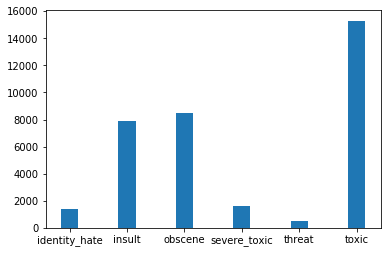

In [60]:
X0=np.arange(6)
Y0=[identity_hate_,insult_,obscene_,severe_toxic_,threat_,toxic_]
name_list0=['identity_hate','insult','obscene','severe_toxic','threat','toxic']
plt.bar(X0,Y0,width = .3,tick_label=name_list0)
plt.show()

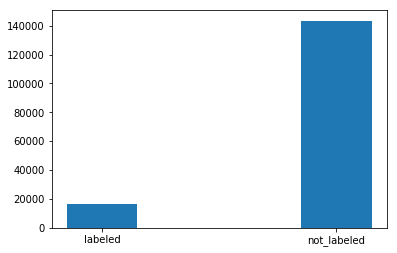

In [61]:
length_train=df.shape
not_labeled =df.loc[:,['labeled']]
not_lebeled_=0
for i in range(length_train[0]):
    if (not_labeled.iloc[i,0]==0):
        not_lebeled_ +=1

labeled_=0
for i in range(length_train[0]):
    if (not_labeled.iloc[i,0]!=0):
        labeled_ +=1
        
X=np.arange(2)
Y=[labeled_, not_lebeled_]
name_list=['labeled','not_labeled']
plt.bar(X,Y,width = .3,tick_label=name_list)
plt.show()